# Import packages

In [92]:
%matplotlib inline
import pandas as pd
from pandas.api.types import is_numeric_dtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Metrics
from sklearn.metrics import precision_score, recall_score, log_loss, accuracy_score, f1_score, confusion_matrix

# Load the dataset

In [93]:
path='https://raw.githubusercontent.com/charlenelau-github/Mushroom-Classification/master/agaricus-lepiota.data'
missing_values = ["n/a", "na", "-", ""]
df = pd.read_csv(path, na_values = missing_values, header=None)
df.head(n=10)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


# Data Preprocessing

## Dealing with missing values

In [94]:
# Check for missing values
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

#### No missing values.

# Data Visualization

In [96]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [97]:
df.groupby(df[0]).size()

0
e    4208
p    3916
dtype: int64

In [98]:
# 4208 edible cases vs 3925 poisonous cases. More or less balanced. Class imbalance will not become an issue.

In [99]:
df=df.apply(LabelEncoder().fit_transform)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
0     8124 non-null int64
1     8124 non-null int64
2     8124 non-null int64
3     8124 non-null int64
4     8124 non-null int64
5     8124 non-null int64
6     8124 non-null int64
7     8124 non-null int64
8     8124 non-null int64
9     8124 non-null int64
10    8124 non-null int64
11    8124 non-null int64
12    8124 non-null int64
13    8124 non-null int64
14    8124 non-null int64
15    8124 non-null int64
16    8124 non-null int64
17    8124 non-null int64
18    8124 non-null int64
19    8124 non-null int64
20    8124 non-null int64
21    8124 non-null int64
22    8124 non-null int64
dtypes: int64(23)
memory usage: 1.4 MB


In [100]:
#Choose 22 predictor variables
X = df.iloc[:,1:23]
#Set column one as target variable
Y = df.iloc[:,0]

## Feature Importance

In [101]:
features = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 
            'gill-attachment', 'gill-spacing','gill-size', 'gill-color', 'stalk-shape', 
            'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',  'stalk-color-above-ring', 'stalk-color-below-ring', 
            'veil-type', 'veil-color', ' ring-number',' ring-type', ' spore-print-color', 
            'population','habitat']

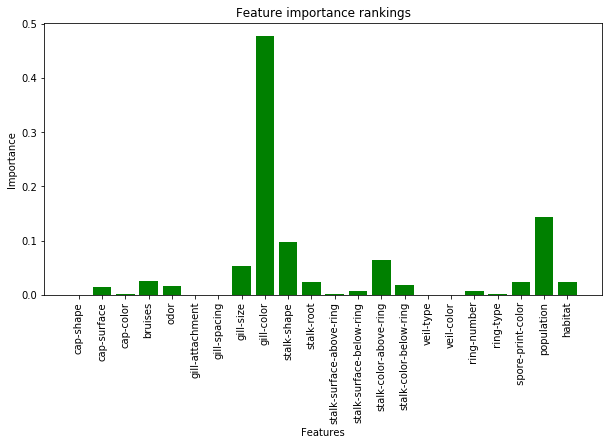

In [106]:
# Feature importance using XGBoost feature selection
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=500)
model.fit(X, Y)
feature_importance = model.feature_importances_
indices= np.argsort(feature_importance)
plt.figure(figsize=(10, 5))
plt.bar(range(len(feature_importance)), feature_importance, align='center', color ="G")
plt.xticks(range(len(feature_importance)), features, rotation='vertical')
plt.title('Feature importance rankings')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

In [105]:
table = pd.DataFrame(model.feature_importances_, columns=['weights'], index=features)
table = table.sort_values(by ='weights', ascending=False)
table

,weights
gill-color,0.478012
population,0.143534
stalk-shape,0.097710
stalk-color-above-ring,0.063925
gill-size,0.053242
bruises,0.026120
habitat,0.023842
stalk-root,0.023567
spore-print-color,0.022758
stalk-color-below-ring,0.017927


In [108]:
#Order of importances : 9, 21, 10, 14, 8, 4, 22, 11, 20, 15, 5, 2, 18, 12, 7, 1, 17, 16, 6

# Modeling

In [68]:
def evaluate_metrics(X_train, Y_train, X_test, Y_test, model):
    
    model.fit(X_train, Y_train)

    predictions_proba = model.predict_proba(X_test)
    predictions = model.predict(X_test)

    log_loss_score = log_loss(Y_test, predictions_proba)
    training = model.score(X_train, Y_train)
    accuracy = accuracy_score(Y_test, predictions)

    print('Log loss: %.4f' % log_loss_score)
    print ('Training accuracy: %.4f' % training)
    print('Model accuracy: %.4f' % accuracy)
    print(classification_report(Y_test, predictions))
    sns.heatmap(data=confusion_matrix(Y_test, predictions), xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test), 
            annot=True, fmt='d', cmap="Reds")

Log loss: 0.0022
Training accuracy: 1.0000
Model accuracy: 0.9998
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2947
          1       1.00      1.00      1.00      2740

avg / total       1.00      1.00      1.00      5687



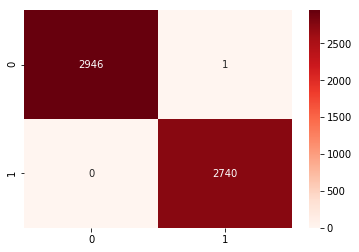

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.7)
model = RandomForestClassifier()
evaluate_metrics(X_train, Y_train, X_test, Y_test, model)


C:\Users\cyine\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\cyine\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Log loss: 0.4818
Training accuracy: 0.9860
Model accuracy: 0.9856
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      2947
          1       0.99      0.98      0.98      2740

avg / total       0.99      0.99      0.99      5687



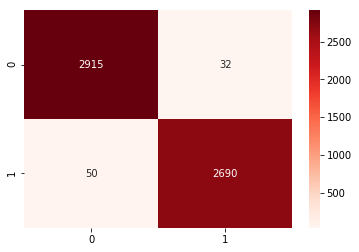

In [112]:
xgb_params = {'learning_rate': 0.003, 
              'max_depth': 5,
              'subsample': 0.9,        
              'colsample_bytree': 0.9,
              'objective': 'binary:logistic',
              'silent': 1, 
              'n_estimators':100, 
              'gamma':1,         
              'min_child_weight':4}
model = XGBClassifier(**xgb_params, seed = 10)
evaluate_metrics(X_train, Y_train, X_test, Y_test, model)

C:\Users\cyine\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\cyine\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Log loss: 0.0129
Training accuracy: 0.9988
Model accuracy: 0.9977
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2951
          1       1.00      1.00      1.00      2736

avg / total       1.00      1.00      1.00      5687



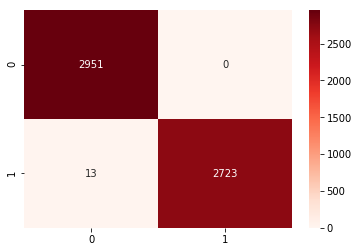

In [128]:
X2=df[[9, 21, 10, 14, 8, 4, 22, 11, 20, 15, 5, 2, 18, 12, 7, 1, 17, 16, 6]]
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.7)
xgb_params = {'learning_rate': 0.1, 
              'max_depth': 5,
              'subsample': 0.9,        
              'colsample_bytree': 0.9,
              'objective': 'binary:logistic',
              'silent': 1, 
              'n_estimators':100, 
              'gamma':1,         
              'min_child_weight':4}
model = XGBClassifier(**xgb_params, seed = 10)
evaluate_metrics(X_train, Y_train, X_test, Y_test, model)


Log loss: 0.0039
Training accuracy: 1.0000
Model accuracy: 0.9986
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2976
          1       1.00      1.00      1.00      2711

avg / total       1.00      1.00      1.00      5687



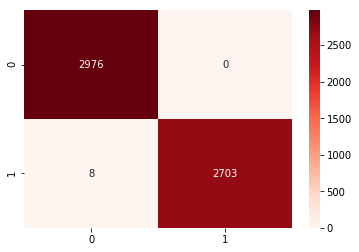

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
X3=df[[9, 21, 10, 14, 8, 4, 22, 11, 20, 15, 5, 2, 18, 12, 7, 1, 17]]
X_train, X_test, Y_train, Y_test = train_test_split(X3, Y, test_size=0.7)
model = RandomForestClassifier()
evaluate_metrics(X_train, Y_train, X_test, Y_test, model)